# Stock Market Chart Pattern Recognition Using Deep learning


📊 COMPLETE STOCK ANALYSIS SYSTEM FOR ADVANC

✅ ดึงข้อมูล ADVANC สำเร็จ: 500 แถว
   ช่วงเวลา: 2023-01-10 00:00:00 ถึง 2025-01-27 00:00:00


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🧠 Training LSTM model...
✅ LSTM: ทำนายราคา 5 วันข้างหน้า = 267.16 THB

🔍 Training CNN pattern recognition...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ CNN: ตรวจพบ H&S pattern 5 รูปแบบ


Device set to use mps:0


✅ Sentiment: POSITIVE (score: 1.00)

🔄 Running Backtesting...
📊 Comparing with baseline strategies...

📋 COMPREHENSIVE ANALYSIS REPORT: ADVANC

🧠 LSTM PRICE PREDICTION METRICS:
--------------------------------------------------------------------------------
   MAE...........................         13.3856
   RMSE..........................         14.5290
   MAPE..........................          4.7706
   R2_Score......................         -0.9452
   Directional_Accuracy..........         41.9355

🔍 CNN PATTERN RECOGNITION METRICS:
--------------------------------------------------------------------------------
   Accuracy......................          0.7979
   Precision.....................          0.7979
   Recall........................          1.0000
   F1_Score......................          0.8876
   ROC_AUC.......................          0.8940

💰 BACKTESTING RESULTS:
--------------------------------------------------------------------------------
   Initial Capital:.

/var/folders/by/j89gc0qj6_zfzkf42sg0dr1c0000gp/T/ipykernel_93964/2019786318.py:803: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/hilmanyusoh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

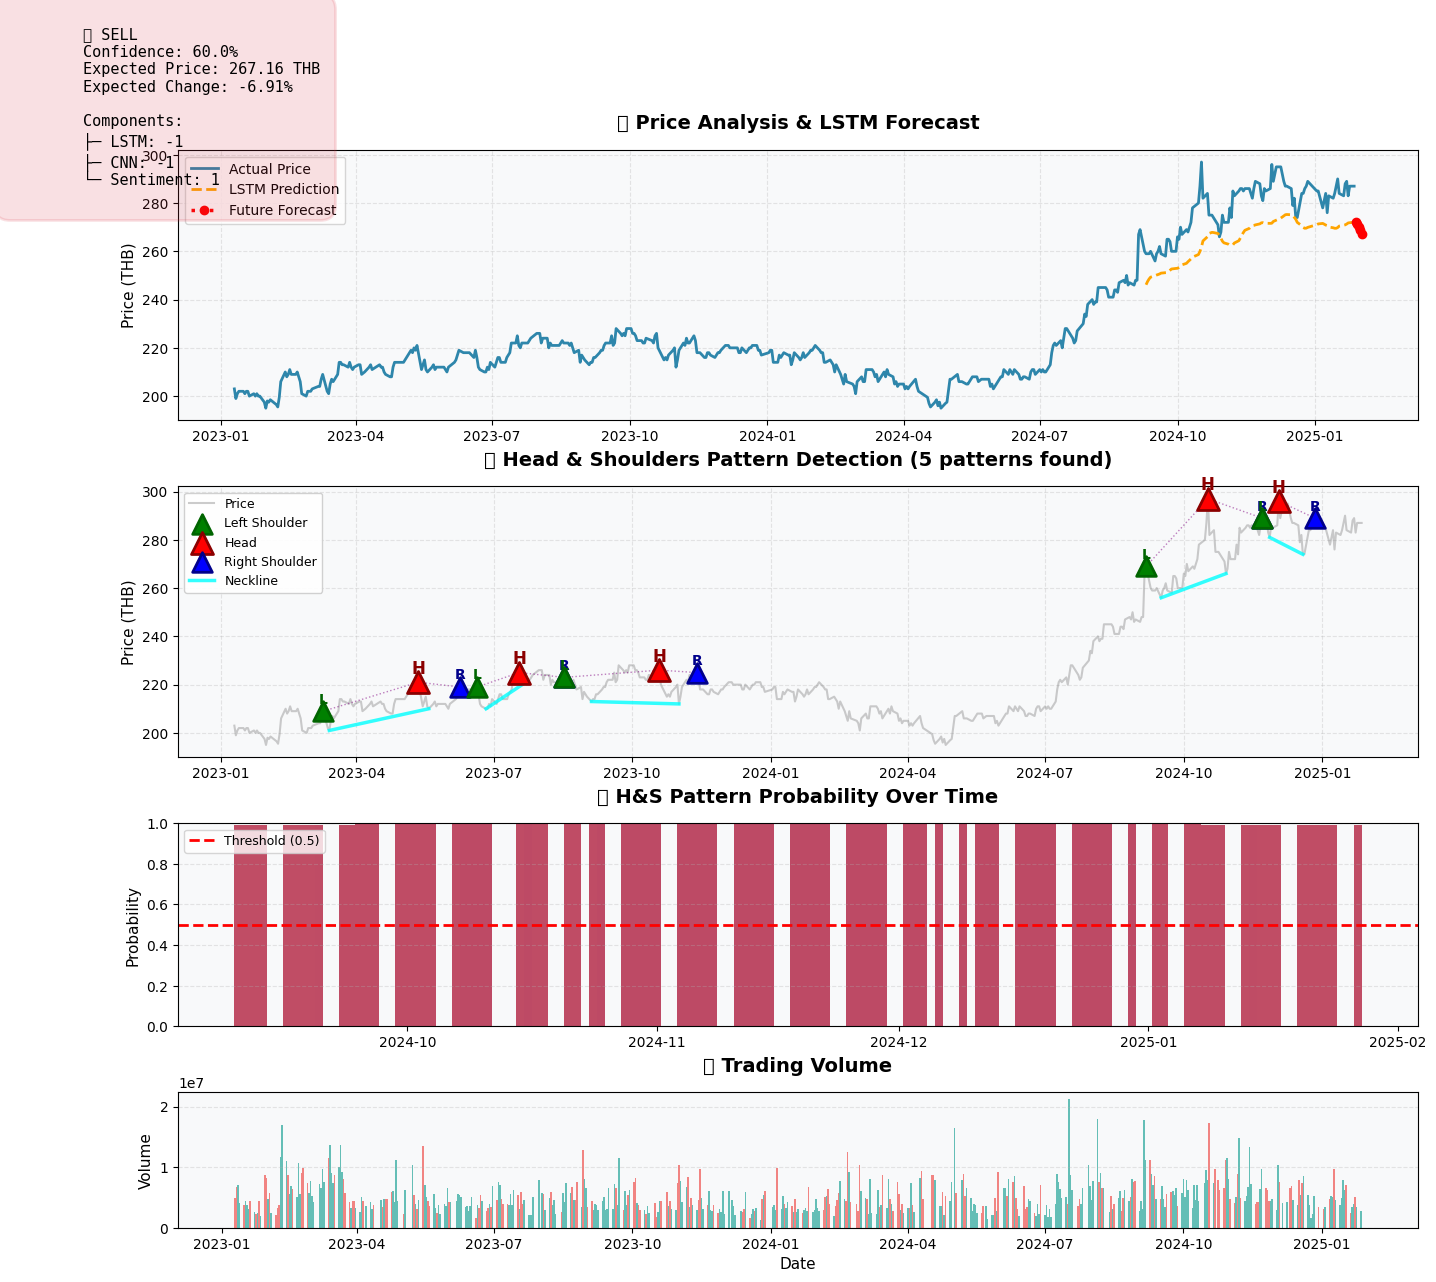

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/var/folders/by/j89gc0qj6_zfzkf42sg0dr1c0000gp/T/ipykernel_93964/2019786318.py:665: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/hilmanyusoh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing

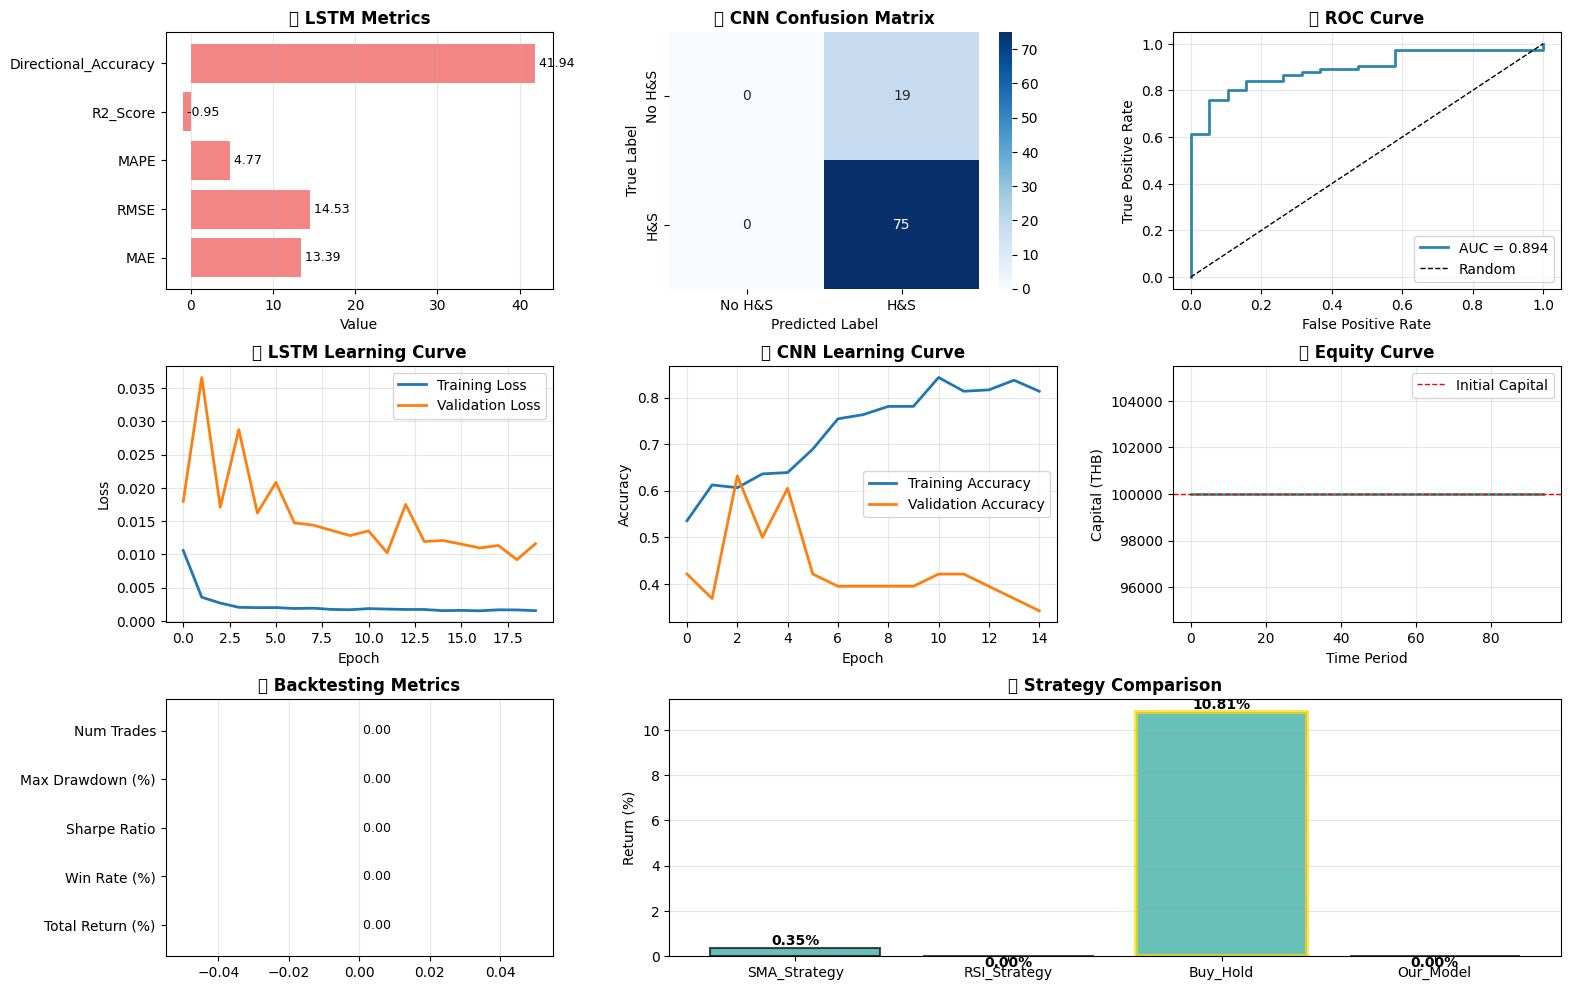

In [2]:
# Complete Stock Market Analysis System with Evaluation Metrics
from cassandra.cluster import Cluster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc,
                             mean_absolute_error, mean_squared_error, r2_score)

# HuggingFace Transformers
from transformers import pipeline   

class StockAnalysisSystem:
    def __init__(self, cassandra_host='127.0.0.1', cassandra_port=9042):
        self.cassandra_host = cassandra_host
        self.cassandra_port = cassandra_port
        self.scaler = MinMaxScaler()
        
    def get_candlestick_data(self, symbol: str, limit: int = 1000):
        """ดึงข้อมูล candlestick จาก Cassandra"""
        try:
            cluster = Cluster([self.cassandra_host], port=self.cassandra_port)
            session = cluster.connect('data_stock')
            
            query = """
                SELECT symbol, time, open, high, low, close, volume, value
                FROM candlestick_data
                WHERE symbol = %s
                LIMIT %s
                ALLOW FILTERING
            """
            
            rows = session.execute(query, (symbol, limit))
            df = pd.DataFrame(list(rows))
            
            if df.empty:
                print(f"⚠️ ไม่พบข้อมูลสำหรับ symbol '{symbol}'")
                return pd.DataFrame()
            
            df['time'] = pd.to_datetime(df['time'])
            df.sort_values('time', inplace=True)
            df.reset_index(drop=True, inplace=True)
            
            print(f"✅ ดึงข้อมูล {symbol} สำเร็จ: {len(df)} แถว")
            print(f"   ช่วงเวลา: {df['time'].min()} ถึง {df['time'].max()}")
            
            return df
            
        except Exception as e:
            print(f"❌ Cassandra error: {e}")
            return pd.DataFrame()
        finally:
            try:
                cluster.shutdown()
            except:
                pass
    
    def lstm_price_prediction(self, df: pd.DataFrame, seq_length=30, forecast_days=5):
        """ทำนายราคาด้วย LSTM พร้อม metrics"""
        close_prices = df['close'].values.reshape(-1, 1)
        close_scaled = self.scaler.fit_transform(close_prices)
        
        # สร้าง sequences
        X, y = [], []
        for i in range(len(close_scaled) - seq_length):
            X.append(close_scaled[i:i+seq_length])
            y.append(close_scaled[i+seq_length])
        X, y = np.array(X), np.array(y)
        
        # Train/Test Split
        split = int(len(X) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]
        
        # Build LSTM Model
        model = Sequential([
            LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
            Dropout(0.2),
            LSTM(32),
            Dropout(0.2),
            Dense(1)
        ])
        model.compile(loss='mse', optimizer='adam')
        
        print("\n🧠 Training LSTM model...")
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                           validation_split=0.1, verbose=0)
        
        # Predict
        y_pred = model.predict(X_test, verbose=0)
        y_pred_rescaled = self.scaler.inverse_transform(y_pred)
        y_test_rescaled = self.scaler.inverse_transform(y_test)
        
        # Calculate Metrics
        mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
        rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
        mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
        r2 = r2_score(y_test_rescaled, y_pred_rescaled)
        
        # Directional Accuracy
        actual_direction = np.sign(np.diff(y_test_rescaled.flatten()))
        pred_direction = np.sign(np.diff(y_pred_rescaled.flatten()))
        directional_accuracy = np.mean(actual_direction == pred_direction) * 100
        
        # Forecast ล่วงหน้า
        last_sequence = close_scaled[-seq_length:].reshape(1, seq_length, 1)
        future_predictions = []
        
        for _ in range(forecast_days):
            next_pred = model.predict(last_sequence, verbose=0)
            future_predictions.append(next_pred[0, 0])
            last_sequence = np.append(last_sequence[:, 1:, :], 
                                     next_pred.reshape(1, 1, 1), axis=1)
        
        future_prices = self.scaler.inverse_transform(
            np.array(future_predictions).reshape(-1, 1)
        )
        
        return {
            'predictions': y_pred_rescaled,
            'actual': y_test_rescaled,
            'future_forecast': future_prices.flatten(),
            'test_start_idx': split + seq_length,
            'history': history.history,
            'metrics': {
                'MAE': mae,
                'RMSE': rmse,
                'MAPE': mape,
                'R2_Score': r2,
                'Directional_Accuracy': directional_accuracy
            }
        }
    
    def generate_hs_labels(self, df: pd.DataFrame, window=5):
        """หา Head & Shoulders pattern พร้อมรายละเอียด"""
        close_prices = df['close'].values
        labels = np.zeros(len(close_prices))
        
        # หา local peaks
        local_max_idx = []
        for i in range(window, len(close_prices) - window):
            is_peak = True
            for j in range(1, window + 1):
                if close_prices[i] <= close_prices[i-j] or close_prices[i] <= close_prices[i+j]:
                    is_peak = False
                    break
            if is_peak:
                local_max_idx.append(i)
        
        hs_patterns = []
        
        # หา H&S pattern
        for i in range(len(local_max_idx) - 2):
            ls_idx = local_max_idx[i]
            head_idx = local_max_idx[i + 1]
            rs_idx = local_max_idx[i + 2]
            
            ls_price = close_prices[ls_idx]
            head_price = close_prices[head_idx]
            rs_price = close_prices[rs_idx]
            
            if (head_price > ls_price and 
                head_price > rs_price and 
                ls_price > 0 and
                abs(ls_price - rs_price) / ls_price < 0.08):
                labels[ls_idx:rs_idx+1] = 1
                
                # หา neckline
                left_valley_idx = ls_idx + np.argmin(close_prices[ls_idx:head_idx+1])
                left_valley_price = close_prices[left_valley_idx]
                
                right_valley_idx = head_idx + np.argmin(close_prices[head_idx:rs_idx+1])
                right_valley_price = close_prices[right_valley_idx]
                
                hs_patterns.append({
                    'left_shoulder': {'idx': ls_idx, 'price': ls_price},
                    'head': {'idx': head_idx, 'price': head_price},
                    'right_shoulder': {'idx': rs_idx, 'price': rs_price},
                    'left_valley': {'idx': left_valley_idx, 'price': left_valley_price},
                    'right_valley': {'idx': right_valley_idx, 'price': right_valley_price}
                })
        
        return labels, hs_patterns
    
    def cnn_pattern_recognition(self, df: pd.DataFrame, seq_length=30):
        """ตรวจจับ pattern ด้วย CNN พร้อม metrics"""
        labels, hs_patterns = self.generate_hs_labels(df)
        
        # Normalize features
        features = df[['close', 'volume']].values
        scaler_features = MinMaxScaler()
        features_scaled = scaler_features.fit_transform(features)
        
        # Create sequences
        X, y = [], []
        for i in range(len(features_scaled) - seq_length):
            X.append(features_scaled[i:i+seq_length])
            y.append(labels[i+seq_length])
        X, y = np.array(X), np.array(y)
        
        # Train/Test Split
        split = int(len(X) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]
        
        # Build CNN Model
        model = Sequential([
            Conv1D(64, kernel_size=3, activation='relu', 
                   input_shape=(seq_length, features.shape[1])),
            MaxPooling1D(pool_size=2),
            Conv1D(32, kernel_size=3, activation='relu'),
            Flatten(),
            Dense(16, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer='adam', 
                      metrics=['accuracy'])
        
        print("\n🔍 Training CNN pattern recognition...")
        history = model.fit(X_train, y_train, epochs=15, batch_size=32, 
                           validation_split=0.1, verbose=0)
        
        # Predict
        y_pred_prob = model.predict(X_test, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)
        
        # Calculate Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        cm = confusion_matrix(y_test, y_pred)
        
        # ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        
        return {
            'predictions': y_pred_prob,
            'actual': y_test,
            'test_start_idx': split + seq_length,
            'threshold': 0.5,
            'hs_patterns': hs_patterns,
            'history': history.history,
            'metrics': {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1,
                'ROC_AUC': roc_auc,
                'Confusion_Matrix': cm
            },
            'roc_data': {'fpr': fpr, 'tpr': tpr}
        }
    
    def analyze_sentiment(self, symbol: str, custom_news=None):
        """วิเคราะห์ sentiment จากข่าว"""
        if custom_news is None:
            news_samples = {
                'ADVANC': [
                    "ADVANC reports strong Q4 earnings, beating expectations",
                    "5G rollout accelerates, ADVANC gains market share"
                ],
                'PTT': [
                    "PTT stock rises on higher oil prices",
                    "Energy sector outlook remains positive"
                ],
                'AOT': [
                    "Airport traffic recovers strongly in tourism season",
                    "AOT announces expansion plans"
                ]
            }
            texts = news_samples.get(symbol, [
                f"{symbol} maintains steady performance",
                "Market conditions remain favorable"
            ])
        else:
            texts = custom_news
        
        try:
            classifier = pipeline("sentiment-analysis", 
                                model="distilbert-base-uncased-finetuned-sst-2-english")
            results = classifier(texts)
            
            sentiment_scores = []
            for r in results:
                score = r['score'] if r['label'] == 'POSITIVE' else -r['score']
                sentiment_scores.append(score)
            
            avg_sentiment = np.mean(sentiment_scores)
            
            return {
                'details': results,
                'average_score': avg_sentiment,
                'signal': 'POSITIVE' if avg_sentiment > 0.1 else 'NEGATIVE' if avg_sentiment < -0.1 else 'NEUTRAL'
            }
        except Exception as e:
            print(f"⚠️ Sentiment analysis error: {e}")
            return {'signal': 'NEUTRAL', 'average_score': 0}
    
    def generate_trading_signal(self, lstm_result, cnn_result, sentiment_result, df):
        """รวมผลจาก 3 โมเดลเป็น trading signal"""
        
        # 1. LSTM Signal
        future_trend = lstm_result['future_forecast']
        current_price = df['close'].iloc[-1]
        price_change_pct = ((future_trend[-1] - current_price) / current_price) * 100
        
        if price_change_pct > 2:
            lstm_signal = 1
        elif price_change_pct < -2:
            lstm_signal = -1
        else:
            lstm_signal = 0
        
        # 2. CNN Signal
        recent_pattern = cnn_result['predictions'][-10:]
        pattern_detected = np.mean(recent_pattern) > cnn_result['threshold']
        cnn_signal = -1 if pattern_detected else 0
        
        # 3. Sentiment Signal
        sentiment_map = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
        sentiment_signal = sentiment_map[sentiment_result['signal']]
        
        # รวม Signal (weighted)
        combined_score = (lstm_signal * 0.5) + (cnn_signal * 0.3) + (sentiment_signal * 0.2)
        
        if combined_score > 0.3:
            final_signal = "🟢 BUY"
            confidence = min(combined_score * 100, 100)
        elif combined_score < -0.3:
            final_signal = "🔴 SELL"
            confidence = min(abs(combined_score) * 100, 100)
        else:
            final_signal = "🟡 HOLD"
            confidence = 50
        
        return {
            'signal': final_signal,
            'confidence': confidence,
            'lstm_contribution': lstm_signal,
            'cnn_contribution': cnn_signal,
            'sentiment_contribution': sentiment_signal,
            'price_forecast': future_trend[-1],
            'expected_change_pct': price_change_pct
        }
    
    def backtest_strategy(self, df, lstm_result, cnn_result, initial_capital=100000):
        """ทดสอบ strategy ย้อนหลัง"""
        test_start = max(lstm_result['test_start_idx'], cnn_result['test_start_idx'])
        test_df = df.iloc[test_start:].copy().reset_index(drop=True)
        
        # สร้าง signals
        lstm_preds = lstm_result['predictions']
        test_len = min(len(test_df), len(lstm_preds))
        test_df = test_df.iloc[:test_len].copy()
        
        signals = []
        for i in range(len(test_df)):
            if i < len(lstm_preds):
                pred_price = lstm_preds[i][0]
                current_price = test_df.iloc[i]['close']
                
                if pred_price > current_price * 1.02:
                    signals.append(1)  # BUY
                elif pred_price < current_price * 0.98:
                    signals.append(-1)  # SELL
                else:
                    signals.append(0)  # HOLD
            else:
                signals.append(0)
        
        test_df['signal'] = signals
        
        # Backtesting
        capital = initial_capital
        position = 0
        shares = 0
        equity_curve = [capital]
        trades = []
        
        for i in range(len(test_df)):
            current_price = test_df.iloc[i]['close']
            signal = test_df.iloc[i]['signal']
            
            if signal == 1 and position == 0:  # BUY
                shares = capital / current_price
                position = 1
                trades.append({
                    'type': 'BUY',
                    'date': test_df.iloc[i]['time'],
                    'price': current_price,
                    'shares': shares
                })
            
            elif signal == -1 and position == 1:  # SELL
                capital = shares * current_price
                profit = capital - initial_capital
                position = 0
                trades.append({
                    'type': 'SELL',
                    'date': test_df.iloc[i]['time'],
                    'price': current_price,
                    'profit': profit
                })
                shares = 0
            
            # Update equity
            if position == 1:
                equity_curve.append(shares * current_price)
            else:
                equity_curve.append(capital)
        
        # Final sell if still holding
        if position == 1:
            capital = shares * test_df.iloc[-1]['close']
        
        # Calculate Metrics
        total_return = ((capital - initial_capital) / initial_capital) * 100
        
        # Buy & Hold Comparison
        buy_hold_return = ((test_df.iloc[-1]['close'] - test_df.iloc[0]['close']) / 
                          test_df.iloc[0]['close']) * 100
        
        # Win Rate
        profitable_trades = [t for t in trades if t['type'] == 'SELL' and t.get('profit', 0) > 0]
        total_sell_trades = [t for t in trades if t['type'] == 'SELL']
        win_rate = (len(profitable_trades) / len(total_sell_trades) * 100) if total_sell_trades else 0
        
        # Sharpe Ratio (simplified)
        returns = np.diff(equity_curve) / equity_curve[:-1]
        sharpe_ratio = (np.mean(returns) / np.std(returns)) * np.sqrt(252) if np.std(returns) > 0 else 0
        
        # Maximum Drawdown
        equity_array = np.array(equity_curve)
        running_max = np.maximum.accumulate(equity_array)
        drawdown = (equity_array - running_max) / running_max
        max_drawdown = np.min(drawdown) * 100
        
        return {
            'final_capital': capital,
            'total_return': total_return,
            'buy_hold_return': buy_hold_return,
            'win_rate': win_rate,
            'num_trades': len(total_sell_trades),
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown,
            'equity_curve': equity_curve,
            'trades': trades,
            'test_df': test_df
        }
    
    def baseline_comparison(self, df, backtest_result):
        """เปรียบเทียบกับ baseline strategies"""
        test_df = backtest_result['test_df']
        
        # 1. Simple Moving Average Strategy (SMA)
        test_df['SMA_20'] = test_df['close'].rolling(window=20).mean()
        test_df['SMA_50'] = test_df['close'].rolling(window=50).mean()
        
        sma_signals = []
        for i in range(len(test_df)):
            if pd.notna(test_df.iloc[i]['SMA_20']) and pd.notna(test_df.iloc[i]['SMA_50']):
                if test_df.iloc[i]['SMA_20'] > test_df.iloc[i]['SMA_50']:
                    sma_signals.append(1)
                else:
                    sma_signals.append(-1)
            else:
                sma_signals.append(0)
        
        # Calculate SMA return
        sma_capital = 100000
        sma_position = 0
        for i, signal in enumerate(sma_signals):
            if signal == 1 and sma_position == 0:
                sma_shares = sma_capital / test_df.iloc[i]['close']
                sma_position = 1
            elif signal == -1 and sma_position == 1:
                sma_capital = sma_shares * test_df.iloc[i]['close']
                sma_position = 0
        
        if sma_position == 1:
            sma_capital = sma_shares * test_df.iloc[-1]['close']
        
        sma_return = ((sma_capital - 100000) / 100000) * 100
        
        # 2. RSI Strategy
        delta = test_df['close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        test_df['RSI'] = 100 - (100 / (1 + rs))
        
        rsi_signals = []
        for i in range(len(test_df)):
            if pd.notna(test_df.iloc[i]['RSI']):
                if test_df.iloc[i]['RSI'] < 30:
                    rsi_signals.append(1)  # Oversold - BUY
                elif test_df.iloc[i]['RSI'] > 70:
                    rsi_signals.append(-1)  # Overbought - SELL
                else:
                    rsi_signals.append(0)
            else:
                rsi_signals.append(0)
        
        # Calculate RSI return
        rsi_capital = 100000
        rsi_position = 0
        for i, signal in enumerate(rsi_signals):
            if signal == 1 and rsi_position == 0:
                rsi_shares = rsi_capital / test_df.iloc[i]['close']
                rsi_position = 1
            elif signal == -1 and rsi_position == 1:
                rsi_capital = rsi_shares * test_df.iloc[i]['close']
                rsi_position = 0
        
        if rsi_position == 1:
            rsi_capital = rsi_shares * test_df.iloc[-1]['close']
        
        rsi_return = ((rsi_capital - 100000) / 100000) * 100
        
        return {
            'SMA_Strategy': {
                'return': sma_return,
                'description': 'SMA 20/50 Crossover'
            },
            'RSI_Strategy': {
                'return': rsi_return,
                'description': 'RSI Oversold/Overbought'
            },
            'Buy_Hold': {
                'return': backtest_result['buy_hold_return'],
                'description': 'Buy and Hold'
            },
            'Our_Model': {
                'return': backtest_result['total_return'],
                'description': 'LSTM + CNN + Sentiment'
            }
        }
    
    def plot_metrics_dashboard(self, lstm_result, cnn_result, backtest_result, comparison):
        """สร้าง dashboard แสดง metrics ทั้งหมด"""
        fig = plt.figure(figsize=(18, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
        
        # 1. LSTM Metrics
        ax1 = fig.add_subplot(gs[0, 0])
        metrics = lstm_result['metrics']
        metric_names = list(metrics.keys())
        metric_values = list(metrics.values())
        colors = ['#26A69A' if v > 50 else '#EF5350' for v in metric_values]
        ax1.barh(metric_names, metric_values, color=colors, alpha=0.7)
        ax1.set_title('📊 LSTM Metrics', fontweight='bold', fontsize=12)
        ax1.set_xlabel('Value')
        for i, v in enumerate(metric_values):
            ax1.text(v, i, f' {v:.2f}', va='center', fontsize=9)
        ax1.grid(axis='x', alpha=0.3)
        
        # 2. CNN Confusion Matrix
        ax2 = fig.add_subplot(gs[0, 1])
        cm = cnn_result['metrics']['Confusion_Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2, 
                   xticklabels=['No H&S', 'H&S'], yticklabels=['No H&S', 'H&S'])
        ax2.set_title('🎯 CNN Confusion Matrix', fontweight='bold', fontsize=12)
        ax2.set_ylabel('True Label')
        ax2.set_xlabel('Predicted Label')
        
        # 3. ROC Curve
        ax3 = fig.add_subplot(gs[0, 2])
        fpr = cnn_result['roc_data']['fpr']
        tpr = cnn_result['roc_data']['tpr']
        auc_score = cnn_result['metrics']['ROC_AUC']
        ax3.plot(fpr, tpr, color='#2E86AB', linewidth=2, label=f'AUC = {auc_score:.3f}')
        ax3.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
        ax3.set_title('📈 ROC Curve', fontweight='bold', fontsize=12)
        ax3.set_xlabel('False Positive Rate')
        ax3.set_ylabel('True Positive Rate')
        ax3.legend()
        ax3.grid(alpha=0.3)
        
        # 4. LSTM Training Loss
        ax4 = fig.add_subplot(gs[1, 0])
        history = lstm_result['history']
        ax4.plot(history['loss'], label='Training Loss', linewidth=2)
        ax4.plot(history['val_loss'], label='Validation Loss', linewidth=2)
        ax4.set_title('🧠 LSTM Learning Curve', fontweight='bold', fontsize=12)
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('Loss')
        ax4.legend()
        ax4.grid(alpha=0.3)
        
        # 5. CNN Training Accuracy
        ax5 = fig.add_subplot(gs[1, 1])
        cnn_history = cnn_result['history']
        ax5.plot(cnn_history['accuracy'], label='Training Accuracy', linewidth=2)
        ax5.plot(cnn_history['val_accuracy'], label='Validation Accuracy', linewidth=2)
        ax5.set_title('🔍 CNN Learning Curve', fontweight='bold', fontsize=12)
        ax5.set_xlabel('Epoch')
        ax5.set_ylabel('Accuracy')
        ax5.legend()
        ax5.grid(alpha=0.3)
        
        # 6. Equity Curve
        ax6 = fig.add_subplot(gs[1, 2])
        equity = backtest_result['equity_curve']
        ax6.plot(equity, linewidth=2, color='#26A69A')
        ax6.axhline(y=100000, color='red', linestyle='--', linewidth=1, label='Initial Capital')
        ax6.set_title('💰 Equity Curve', fontweight='bold', fontsize=12)
        ax6.set_xlabel('Time Period')
        ax6.set_ylabel('Capital (THB)')
        ax6.legend()
        ax6.grid(alpha=0.3)
        ax6.fill_between(range(len(equity)), 100000, equity, alpha=0.3, color='#26A69A')
        
        # 7. Backtesting Metrics
        ax7 = fig.add_subplot(gs[2, 0])
        bt_metrics = {
            'Total Return (%)': backtest_result['total_return'],
            'Win Rate (%)': backtest_result['win_rate'],
            'Sharpe Ratio': backtest_result['sharpe_ratio'],
            'Max Drawdown (%)': backtest_result['max_drawdown'],
            'Num Trades': backtest_result['num_trades']
        }
        metric_names = list(bt_metrics.keys())
        metric_values = list(bt_metrics.values())
        colors = ['#26A69A' if 'Return' in k or 'Win' in k or 'Sharpe' in k 
                 else '#EF5350' for k in metric_names]
        ax7.barh(metric_names, metric_values, color=colors, alpha=0.7)
        ax7.set_title('📊 Backtesting Metrics', fontweight='bold', fontsize=12)
        for i, v in enumerate(metric_values):
            ax7.text(v, i, f' {v:.2f}', va='center', fontsize=9)
        ax7.grid(axis='x', alpha=0.3)
        
        # 8. Strategy Comparison
        ax8 = fig.add_subplot(gs[2, 1:])
        strategies = list(comparison.keys())
        returns = [comparison[s]['return'] for s in strategies]
        colors_comp = ['#26A69A' if r > 0 else '#EF5350' for r in returns]
        bars = ax8.bar(strategies, returns, color=colors_comp, alpha=0.7, edgecolor='black', linewidth=1.5)
        ax8.set_title('🏆 Strategy Comparison', fontweight='bold', fontsize=12)
        ax8.set_ylabel('Return (%)')
        ax8.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax8.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax8.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom' if height > 0 else 'top', 
                    fontsize=10, fontweight='bold')
        
        # Highlight best strategy
        best_idx = np.argmax(returns)
        bars[best_idx].set_edgecolor('gold')
        bars[best_idx].set_linewidth(3)
        
        plt.tight_layout()
        plt.show()
    
    def plot_complete_analysis(self, df, lstm_result, cnn_result, trading_signal):
        """กราฟวิเคราะห์หลัก"""
        fig = plt.figure(figsize=(16, 14))
        gs = fig.add_gridspec(4, 1, height_ratios=[2, 2, 1.5, 1], hspace=0.3)
        
        # Plot 1: Price + LSTM Prediction
        ax1 = fig.add_subplot(gs[0])
        ax1.plot(df['time'], df['close'], label='Actual Price', linewidth=2, color='#2E86AB')
        
        test_start = lstm_result['test_start_idx']
        test_times = df['time'].iloc[test_start:test_start+len(lstm_result['predictions'])]
        ax1.plot(test_times, lstm_result['predictions'], 
                 label='LSTM Prediction', linestyle='--', color='orange', linewidth=2)
        
        # Future forecast
        last_date = df['time'].iloc[-1]
        future_dates = pd.date_range(start=last_date + timedelta(days=1), 
                                    periods=len(lstm_result['future_forecast']))
        ax1.plot(future_dates, lstm_result['future_forecast'], 
                 label='Future Forecast', linestyle=':', color='red', linewidth=2.5, marker='o', markersize=6)
        
        ax1.set_title('📈 Price Analysis & LSTM Forecast', fontsize=14, fontweight='bold', pad=15)
        ax1.set_ylabel('Price (THB)', fontsize=11)
        ax1.legend(loc='upper left', fontsize=10)
        ax1.grid(True, alpha=0.3, linestyle='--')
        ax1.set_facecolor('#f8f9fa')
        
        # Plot 2: Head & Shoulders Pattern Detection
        ax2 = fig.add_subplot(gs[1])
        ax2.plot(df['time'], df['close'], label='Price', color='gray', alpha=0.4, linewidth=1.5)
        
        hs_patterns = cnn_result['hs_patterns']
        if hs_patterns:
            for pattern in hs_patterns:
                ls = pattern['left_shoulder']
                head = pattern['head']
                rs = pattern['right_shoulder']
                lv = pattern['left_valley']
                rv = pattern['right_valley']
                
                # Plot shoulders and head
                ax2.scatter(df['time'].iloc[ls['idx']], ls['price'], 
                           color='green', s=200, marker='^', 
                           label='Left Shoulder' if pattern == hs_patterns[0] else '', 
                           zorder=5, edgecolors='darkgreen', linewidths=2)
                ax2.text(df['time'].iloc[ls['idx']], ls['price'] + 2, 'L', 
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='darkgreen')
                
                ax2.scatter(df['time'].iloc[head['idx']], head['price'], 
                           color='red', s=250, marker='^', 
                           label='Head' if pattern == hs_patterns[0] else '', 
                           zorder=5, edgecolors='darkred', linewidths=2)
                ax2.text(df['time'].iloc[head['idx']], head['price'] + 2, 'H', 
                        ha='center', va='bottom', fontsize=12, fontweight='bold', color='darkred')
                
                ax2.scatter(df['time'].iloc[rs['idx']], rs['price'], 
                           color='blue', s=200, marker='^', 
                           label='Right Shoulder' if pattern == hs_patterns[0] else '', 
                           zorder=5, edgecolors='darkblue', linewidths=2)
                ax2.text(df['time'].iloc[rs['idx']], rs['price'] + 2, 'R', 
                        ha='center', va='bottom', fontsize=10, fontweight='bold', color='darkblue')
                
                # Neckline
                neckline_times = [df['time'].iloc[lv['idx']], df['time'].iloc[rv['idx']]]
                neckline_prices = [lv['price'], rv['price']]
                ax2.plot(neckline_times, neckline_prices, 
                        color='cyan', linewidth=2.5, linestyle='-', 
                        label='Neckline' if pattern == hs_patterns[0] else '', 
                        zorder=4, alpha=0.8)
                
                # Connect pattern
                pattern_times = [df['time'].iloc[ls['idx']], df['time'].iloc[head['idx']], 
                               df['time'].iloc[rs['idx']]]
                pattern_prices = [ls['price'], head['price'], rs['price']]
                ax2.plot(pattern_times, pattern_prices, 
                        color='purple', linewidth=1, linestyle=':', alpha=0.5, zorder=3)
            
            ax2.set_title(f'🔻 Head & Shoulders Pattern Detection ({len(hs_patterns)} patterns found)', 
                         fontsize=14, fontweight='bold', pad=15)
        else:
            ax2.set_title('🔻 Head & Shoulders Pattern Detection (No patterns found)', 
                         fontsize=14, fontweight='bold', pad=15)
        
        ax2.set_ylabel('Price (THB)', fontsize=11)
        ax2.legend(loc='upper left', fontsize=9, framealpha=0.9)
        ax2.grid(True, alpha=0.3, linestyle='--')
        ax2.set_facecolor('#f8f9fa')
        
        # Plot 3: Pattern Probability
        ax3 = fig.add_subplot(gs[2])
        test_start_cnn = cnn_result['test_start_idx']
        pattern_probs = cnn_result['predictions']
        pattern_times = df['time'].iloc[test_start_cnn:test_start_cnn+len(pattern_probs)]
        
        colors_map = plt.cm.RdYlGn_r(pattern_probs)
        ax3.bar(pattern_times, pattern_probs, color=colors_map, alpha=0.7, width=1)
        ax3.axhline(y=cnn_result['threshold'], color='red', linestyle='--', 
                   linewidth=2, label=f"Threshold ({cnn_result['threshold']})")
        ax3.set_title('📊 H&S Pattern Probability Over Time', fontsize=14, fontweight='bold', pad=15)
        ax3.set_ylabel('Probability', fontsize=11)
        ax3.set_ylim([0, 1])
        ax3.legend(loc='upper left', fontsize=9)
        ax3.grid(True, alpha=0.3, linestyle='--', axis='y')
        ax3.set_facecolor('#f8f9fa')
        
        # Plot 4: Volume
        ax4 = fig.add_subplot(gs[3])
        colors = ['#26A69A' if df['close'].iloc[i] >= df['open'].iloc[i] else '#EF5350' 
                  for i in range(len(df))]
        ax4.bar(df['time'], df['volume'], color=colors, alpha=0.7, width=1)
        ax4.set_title('📊 Trading Volume', fontsize=14, fontweight='bold', pad=15)
        ax4.set_ylabel('Volume', fontsize=11)
        ax4.set_xlabel('Date', fontsize=11)
        ax4.grid(True, alpha=0.3, linestyle='--', axis='y')
        ax4.set_facecolor('#f8f9fa')
        
        # Trading Signal Box
        signal_color = '#28a745' if '🟢' in trading_signal['signal'] else '#dc3545' if '🔴' in trading_signal['signal'] else '#ffc107'
        signal_text = f"""
        {trading_signal['signal']}
        Confidence: {trading_signal['confidence']:.1f}%
        Expected Price: {trading_signal['price_forecast']:.2f} THB
        Expected Change: {trading_signal['expected_change_pct']:+.2f}%
        
        Components:
        ├─ LSTM: {trading_signal['lstm_contribution']}
        ├─ CNN: {trading_signal['cnn_contribution']}  
        └─ Sentiment: {trading_signal['sentiment_contribution']}
        """
        fig.text(0.02, 0.98, signal_text, fontsize=11, 
                verticalalignment='top', 
                bbox=dict(boxstyle='round,pad=1', facecolor=signal_color, 
                         alpha=0.15, edgecolor=signal_color, linewidth=2),
                family='monospace')
        
        plt.tight_layout()
        plt.show()
    
    def print_comprehensive_report(self, symbol, lstm_result, cnn_result, 
                                   backtest_result, comparison, trading_signal):
        """พิมพ์รายงานสรุปแบบละเอียด"""
        print("\n" + "="*80)
        print(f"📋 COMPREHENSIVE ANALYSIS REPORT: {symbol}")
        print("="*80)
        
        # LSTM Metrics
        print("\n🧠 LSTM PRICE PREDICTION METRICS:")
        print("-" * 80)
        for key, value in lstm_result['metrics'].items():
            print(f"   {key:.<30} {value:>15.4f}")
        
        # CNN Metrics
        print("\n🔍 CNN PATTERN RECOGNITION METRICS:")
        print("-" * 80)
        for key, value in cnn_result['metrics'].items():
            if key != 'Confusion_Matrix':
                print(f"   {key:.<30} {value:>15.4f}")
        
        # Backtesting Results
        print("\n💰 BACKTESTING RESULTS:")
        print("-" * 80)
        print(f"   Initial Capital:............... {100000:>15,.2f} THB")
        print(f"   Final Capital:................. {backtest_result['final_capital']:>15,.2f} THB")
        print(f"   Total Return:.................. {backtest_result['total_return']:>15.2f} %")
        print(f"   Buy & Hold Return:............. {backtest_result['buy_hold_return']:>15.2f} %")
        print(f"   Win Rate:...................... {backtest_result['win_rate']:>15.2f} %")
        print(f"   Number of Trades:.............. {backtest_result['num_trades']:>15}")
        print(f"   Sharpe Ratio:.................. {backtest_result['sharpe_ratio']:>15.4f}")
        print(f"   Maximum Drawdown:.............. {backtest_result['max_drawdown']:>15.2f} %")
        
        # Strategy Comparison
        print("\n🏆 STRATEGY COMPARISON:")
        print("-" * 80)
        for strategy, data in comparison.items():
            print(f"   {data['description']:.<40} {data['return']:>12.2f} %")
        
        # Trading Signal
        print("\n🎯 CURRENT TRADING SIGNAL:")
        print("-" * 80)
        print(f"   Signal:........................ {trading_signal['signal']}")
        print(f"   Confidence:.................... {trading_signal['confidence']:.1f} %")
        print(f"   Expected Price:................ {trading_signal['price_forecast']:.2f} THB")
        print(f"   Expected Change:............... {trading_signal['expected_change_pct']:+.2f} %")
        
        print("\n" + "="*80 + "\n")
    
    def run_complete_analysis(self, symbol: str, limit=1000):
        """รันการวิเคราะห์แบบครบวงจร พร้อม metrics ทั้งหมด"""
        print(f"\n{'='*80}")
        print(f"📊 COMPLETE STOCK ANALYSIS SYSTEM FOR {symbol}")
        print(f"{'='*80}\n")
        
        # 1. ดึงข้อมูล
        df = self.get_candlestick_data(symbol, limit)
        if df.empty:
            return None
        
        # 2. LSTM Price Prediction
        lstm_result = self.lstm_price_prediction(df)
        print(f"✅ LSTM: ทำนายราคา 5 วันข้างหน้า = {lstm_result['future_forecast'][-1]:.2f} THB")
        
        # 3. CNN Pattern Recognition
        cnn_result = self.cnn_pattern_recognition(df)
        pattern_count = len(cnn_result['hs_patterns'])
        print(f"✅ CNN: ตรวจพบ H&S pattern {pattern_count} รูปแบบ")
        
        # 4. Sentiment Analysis
        sentiment_result = self.analyze_sentiment(symbol)
        print(f"✅ Sentiment: {sentiment_result['signal']} (score: {sentiment_result['average_score']:.2f})")
        
        # 5. Generate Trading Signal
        trading_signal = self.generate_trading_signal(lstm_result, cnn_result, sentiment_result, df)
        
        # 6. Backtesting
        print("\n🔄 Running Backtesting...")
        backtest_result = self.backtest_strategy(df, lstm_result, cnn_result)
        
        # 7. Baseline Comparison
        print("📊 Comparing with baseline strategies...")
        comparison = self.baseline_comparison(df, backtest_result)
        
        # 8. Print Comprehensive Report
        self.print_comprehensive_report(symbol, lstm_result, cnn_result, 
                                       backtest_result, comparison, trading_signal)
        
        # 9. Visualizations
        print("📈 Generating visualizations...")
        self.plot_complete_analysis(df, lstm_result, cnn_result, trading_signal)
        self.plot_metrics_dashboard(lstm_result, cnn_result, backtest_result, comparison)
        
        return {
            'dataframe': df,
            'lstm': lstm_result,
            'cnn': cnn_result,
            'sentiment': sentiment_result,
            'trading_signal': trading_signal,
            'backtest': backtest_result,
            'comparison': comparison
        }


# ==================== MAIN ====================
if __name__ == "__main__":
    # สร้าง system
    system = StockAnalysisSystem()
    
    # วิเคราะห์หุ้น ADVANC แบบครบวงจร
    results = system.run_complete_analysis('ADVANC', limit=500)
    
    # สามารถวิเคราะห์หุ้นอื่นได้
    # results_ptt = system.run_complete_analysis('PTT', limit=500)